### Exercise 1

Try clustering the iris data.  Try different numbers of clusters. Print the confusion matrix that compares the cluster labels with the actual labels.  What seems to give the best clustering according to ground truth?  How do you know?

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
data = load_iris()
X = data.data
y = data.target


clusters = [2, 3, 4, 5]  # Number of clusters to test

for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)

    cm = confusion_matrix(y, y_pred) 
    print(f"\nk = {k}")
    print(cm) 



k = 2
[[ 0 50  0]
 [47  3  0]
 [50  0  0]]

k = 3
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]

k = 4
[[ 0 50  0  0]
 [23  0 27  0]
 [26  0  1 23]
 [ 0  0  0  0]]

k = 5
[[ 0 50  0  0  0]
 [23  0 27  0  0]
 [13  0  1 12 24]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


##NOTES FROM CHAT GPT TO HELP ME UNDERSTAND FURTHER WHY 3 IS THE BEST 

Great! Let's analyze these confusion matrices to determine the best clustering based on the ground truth of the Iris dataset:

Understanding the Matrices

Rows: Represent the true Iris species.
Columns: Represent the cluster assignments made by K-means.
Analysis

k = 2:

This clustering doesn't represent the three Iris species well. It seems to lump two species together while incorrectly splitting the third species across both clusters.
k = 3:

This is a significantly better clustering! It almost perfectly aligns with the three Iris species. There are only a few misclassifications (3 and 14).
k = 4 and k = 5

These split the Iris data into smaller groups. While it might be possible that there are genuine subgroups within the Iris data, k=3 gives the most parsimonious representation aligning with the knowledge that there are three primary species.
Conclusion

Based on our understanding of the Iris dataset and these confusion matrices, k = 3 provides the best clustering according to the ground truth. It aligns most closely with the known three species of Iris.

Important Considerations:

Clustering purpose: If your goal was to discover subtle variations within an Iris species, then k > 3 might be worth exploring further.
Evaluation metrics: Using formal clustering evaluation metrics can provide an additional numerical perspective when choosing the best 'k'. These metrics help quantify cluster separation and compactness.
Let me know if you'd like to explore further analysis, calculate evaluation metrics, or visualize the clustering results!

### Exercise 2

Use the elbow method, the silhouette method, and the Davies-Bouldin method to evaluate your clustering result.  Do the data-driven methods provide clear guidance?

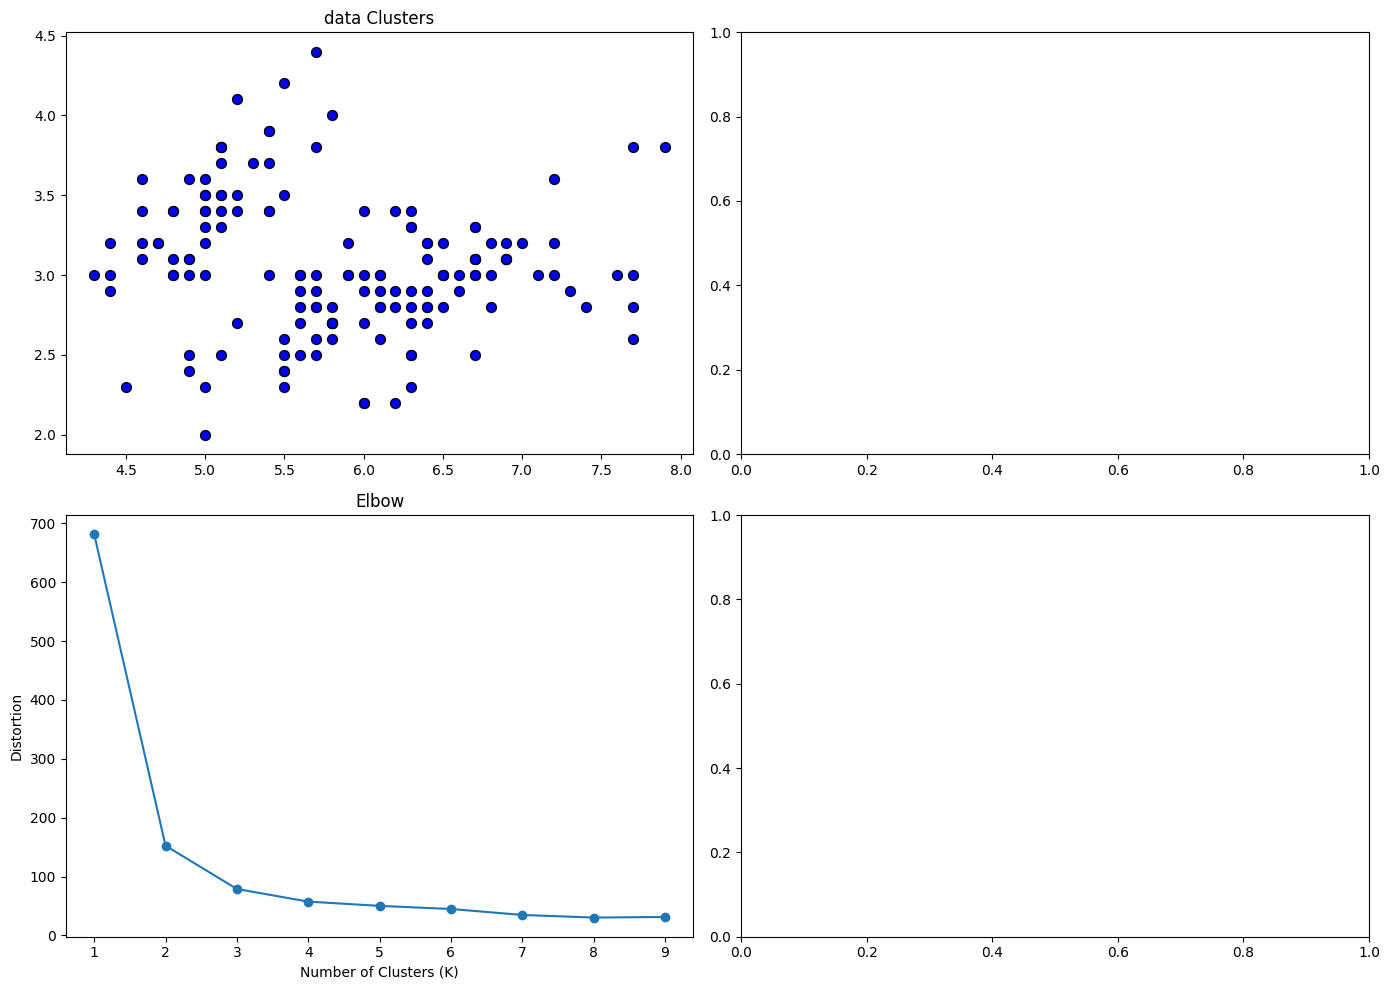

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to apply KMeans and plot elbow graph
def plot_elbow(ax, X, title):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    
    ax.plot(K, distortions, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Distortion')

# Function to plot data
def plot_data(ax, X, title):
    ax.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and elbow graphs
plot_data(axes[0, 0], X, 'data Clusters')
plot_elbow(axes[1, 0], X, 'Elbow')


plt.tight_layout()
plt.show()

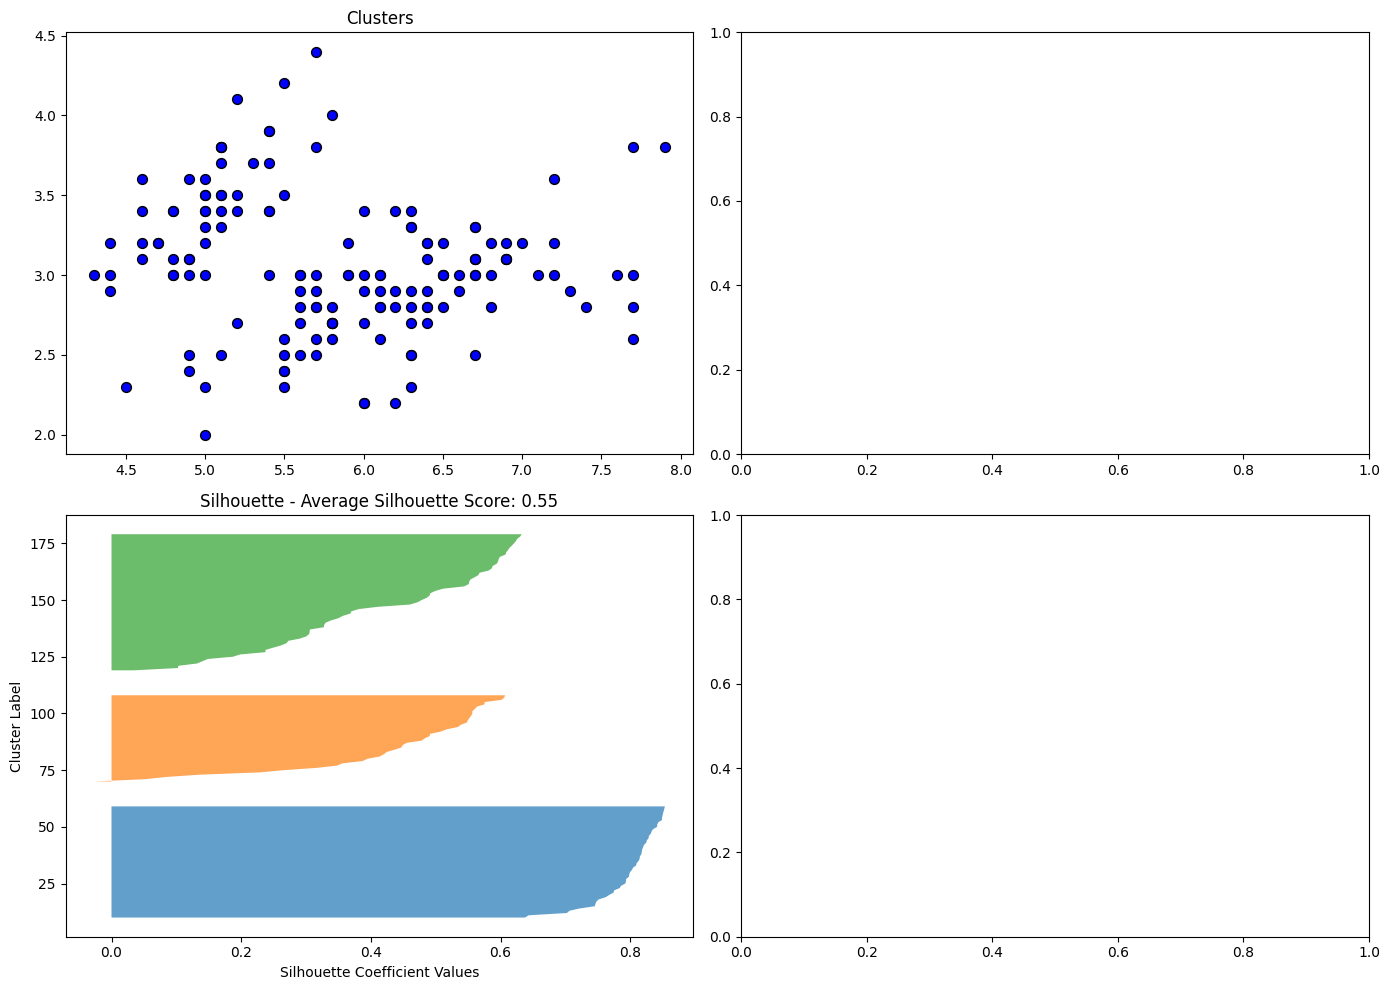

In [5]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Function to apply KMeans and plot silhouette graph
def plot_silhouette(ax, X, title):
    # List to store average silhouette scores for different number of clusters
    avg_silhouette_scores = []
    K = [3]  # Start from 2 as silhouette score requires at least 2 clusters
    
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        cluster_labels = kmeans.fit_predict(X)
        
        # Calculate the silhouette score for the current number of clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        avg_silhouette_scores.append(silhouette_avg)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        # Plot silhouette scores for each cluster
        y_lower = 10  # For space between silhouette plots of individual clusters
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
            y_lower = y_upper + 10

    ax.set_title(f"{title} - Average Silhouette Score: {silhouette_avg:.2f}")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and silhouette graphs
plot_data(axes[0, 0], X, 'Clusters')
plot_silhouette(axes[1, 0], X, 'Silhouette')

plt.tight_layout()
plt.show()


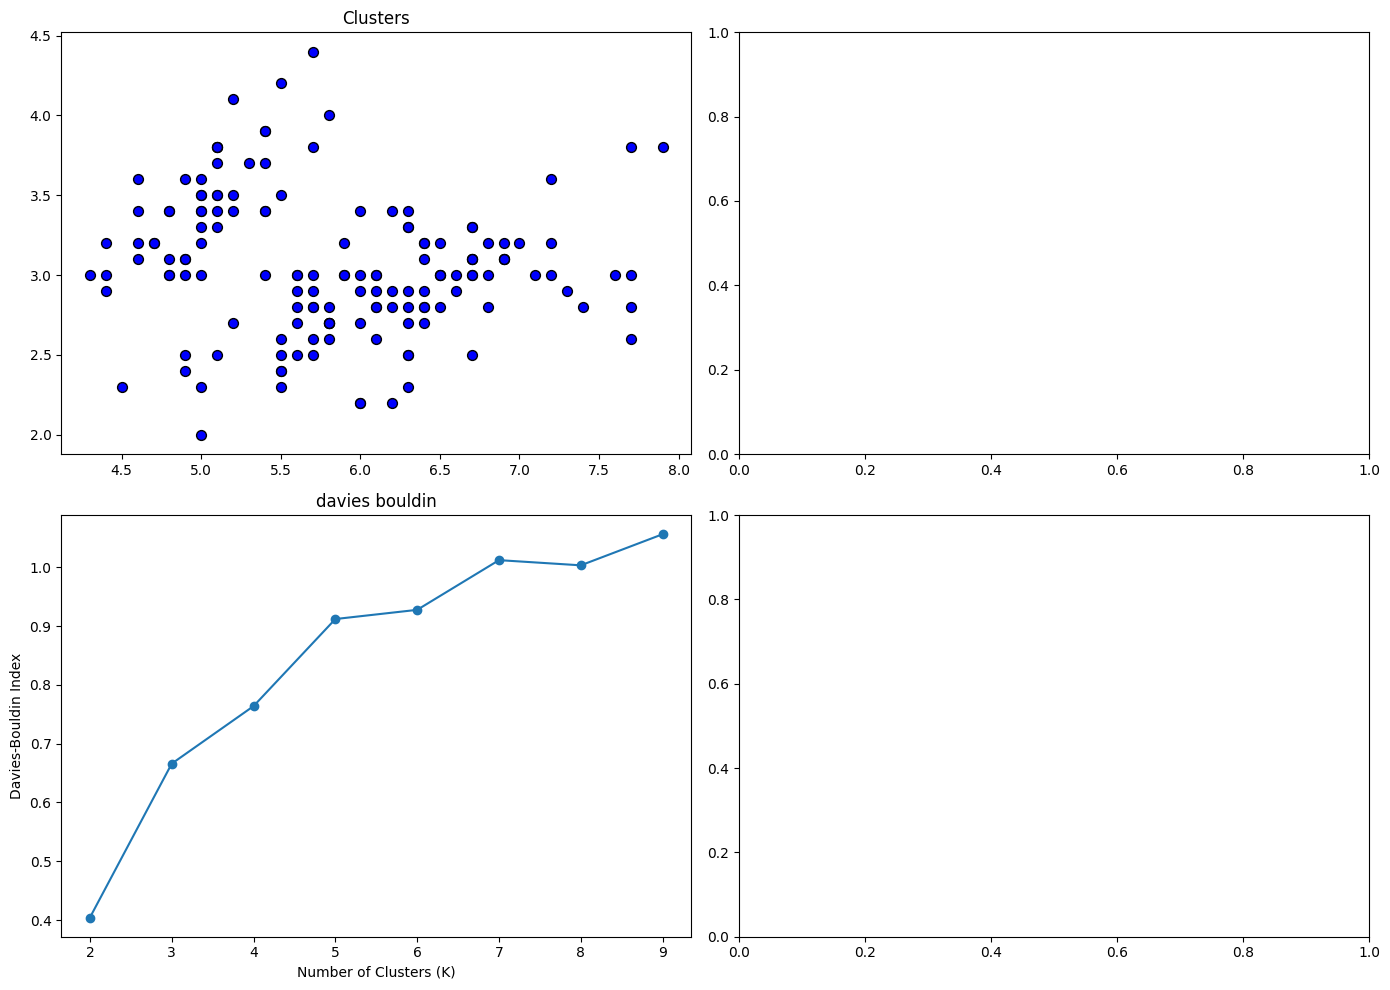

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Generate synthetic data with 3 clear clusters
X1, y1 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Generate synthetic data with no clear clusters (high standard deviation)
X2, y2 = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=5)

# Function to apply KMeans and plot silhouette scores
def plot_davies_bouldin(ax, X, title):
    db_scores = []
    K = range(2, 10)  # Davies-Bouldin is undefined for n_clusters=1
    for k in K:
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(X)
        labels = kmeans.labels_
        db_score = davies_bouldin_score(X, labels)
        db_scores.append(db_score)
    
    ax.plot(K, db_scores, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Davies-Bouldin Index')

# Function to plot data
def plot_data(ax, X, title):
    ax.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot data and silhouette graphs
plot_data(axes[0, 0], X, 'Clusters')
plot_davies_bouldin(axes[1, 0], X, 'davies bouldin')

plt.tight_layout()
plt.show()

### Exercise 3

In the following example, MeanShift, SpectralClustering, DBScan and HDBScan to fit the data. For each clustering method, can you find parameter setting that result in approximately the same clustering?  How would you do this without visual inspection?

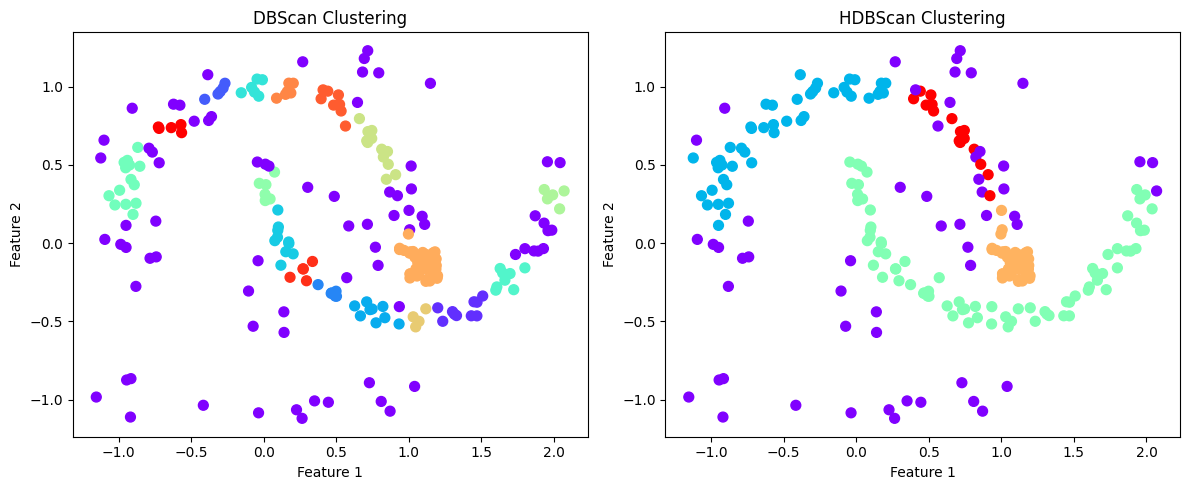

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import hdbscan
from sklearn.cluster import DBSCAN

# Create synthetic data: two moons + noise + a dense small cluster
moons_data, _ = make_moons(n_samples=150, noise=0.05)
noise = np.random.rand(50, 2) * 2.5 - 1.25
dense_cluster = np.random.rand(50, 2) * 0.2 + [1, -0.25]
data = np.vstack([moons_data, noise, dense_cluster])

# DBScan clustering
dbscan_labels = DBSCAN(eps=0.11, min_samples=5).fit_predict(data)

# HDBScan clustering
hdbscan_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10).fit_predict(data)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='rainbow', s=50)
ax1.set_title('DBScan Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(data[:, 0], data[:, 1], c=hdbscan_labels, cmap='rainbow', s=50)
ax2.set_title('HDBScan Clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [7]:
%pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3675170 sha256=16b2b23d71ed96d43812dc5fbc7d1a41651e5c740e9b3a485a483c9af8e29a7f
  Stored in directory: /home/codespace/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.


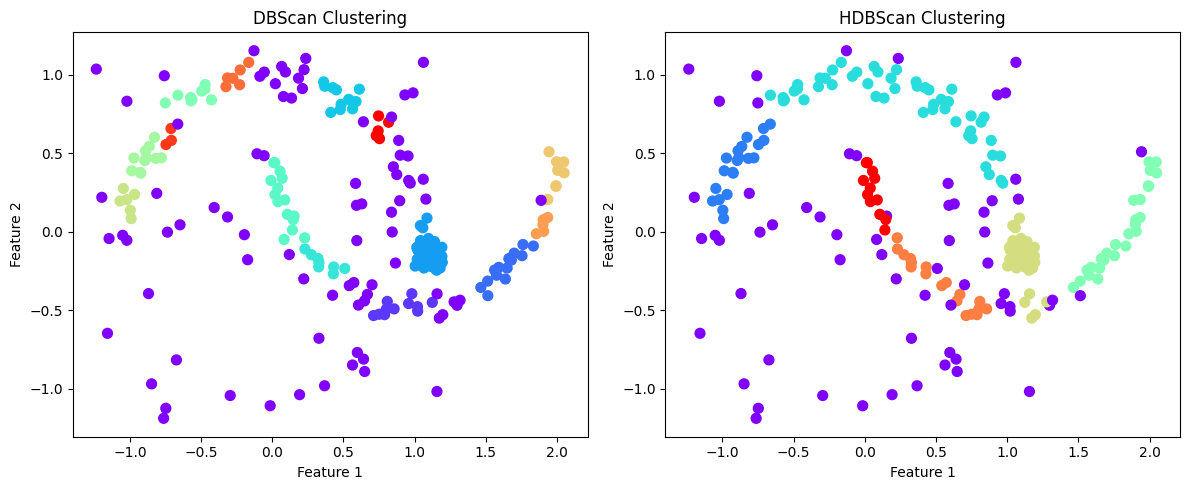

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import hdbscan
from sklearn.cluster import DBSCAN

# Create synthetic data: two moons + noise + a dense small cluster
moons_data, _ = make_moons(n_samples=150, noise=0.05)
noise = np.random.rand(50, 2) * 2.5 - 1.25
dense_cluster = np.random.rand(50, 2) * 0.2 + [1, -0.25]
data = np.vstack([moons_data, noise, dense_cluster])

# DBScan clustering
dbscan_labels = DBSCAN(eps=0.11, min_samples=5).fit_predict(data)

# HDBScan clustering
hdbscan_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10).fit_predict(data)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='rainbow', s=50)
ax1.set_title('DBScan Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(data[:, 0], data[:, 1], c=hdbscan_labels, cmap='rainbow', s=50)
ax2.set_title('HDBScan Clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

adjust eps in db scan for larger clusters ie you cluster everytging. move it down and it gets better  but you lose things. change the density too . build a cluster that woulkd look for regions of substantive density. 

### Exercise 4

The following plot contains five clusters.  See if you can set the parameters of GMM to identify all clusters.

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


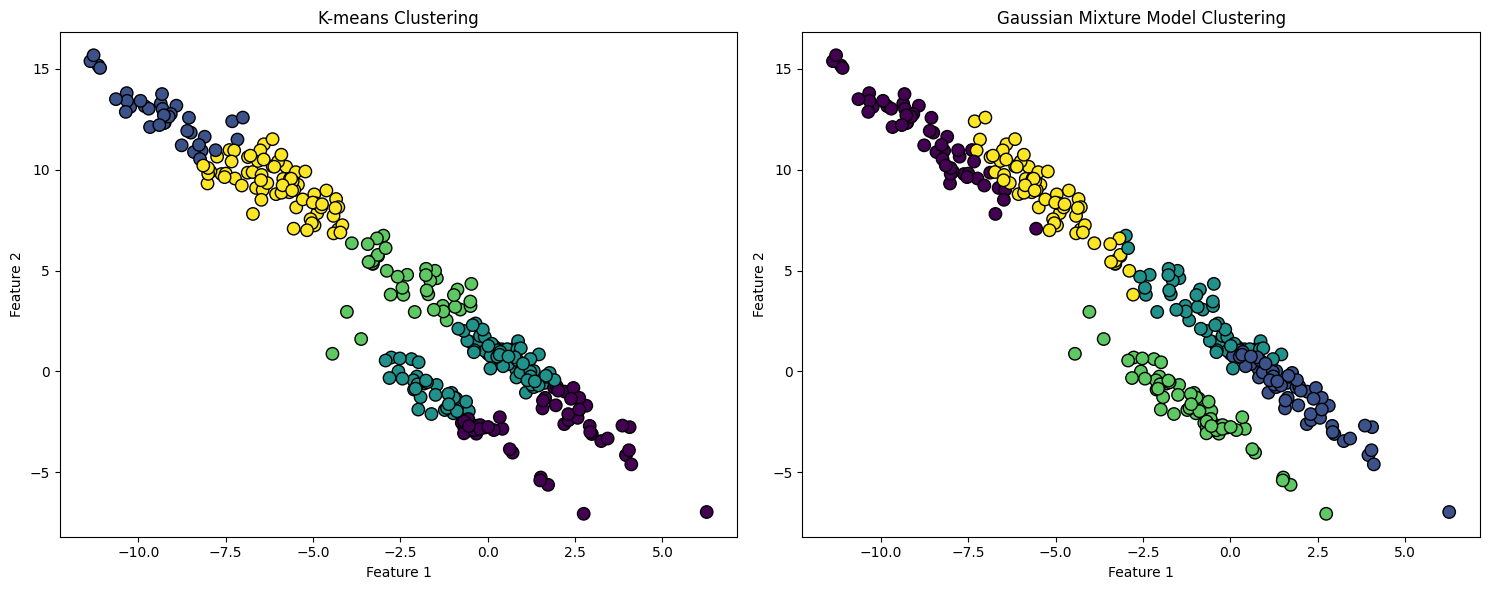

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data with spherical clusters
X, y = make_blobs(n_samples=300, centers=5, cluster_std=2.0,random_state=42)

# Stretch and rotate some of the blobs to create elliptical clusters
transformation_matrix = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation_matrix)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
